In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from scipy import ndimage

## Read Image

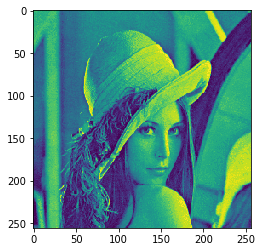

In [2]:
def readpgm(name):
    with open(name) as f:
         lines = f.readlines()

    # Ignores commented lines
    for l in list(lines):
        if l[0] == '#':
            lines.remove(l)

    # Makes sure it is ASCII format (P2)
    assert lines[0].strip() == 'P2' 

    # Converts data to a list of integers
    data = []
    for line in lines[1:]:
        data.extend([int(c) for c in line.split()])

    return (np.array(data[3:]),(data[1],data[0]),data[2])

data = readpgm('lena.pgm')
img_data = np.reshape(data[0],data[1])
plt.imshow(img_data)

## Write Image

In [3]:
width = img_data.shape[0]
height = img_data.shape[1]
arr = img_data

# open file for writing 
filename = 'lena_output.pgm'
fout=open(filename, 'wb')

# define PGM Header
pgmHeader = 'P2' + ' ' + str(width) + ' ' + str(height) + ' ' + str(255) +  '\n'

pgmHeader_byte = bytearray(pgmHeader,'utf-8')

# write the header to the file
fout.write(pgmHeader_byte)

# write the data to the file 
img = np.reshape(arr,(height,width))

for j in range(height):
    bnd = list(img[j,:])
    bnd_str = np.char.mod('%d',bnd)
    bnd_str = np.append(bnd_str,'\n')
    bnd_str = [' '.join(bnd_str)][0]    
    bnd_byte = bytearray(bnd_str,'utf-8')        
    fout.write(bnd_byte)

fout.close()

## Linear

### Piecewise-Linear Transformation

In [4]:
# Function to map each intensity level to output intensity level. 
def pixelVal(pix, r1, s1, r2, s2): 
    if (0 <= pix and pix <= r1): 
        return (s1 / r1)*pix 
    elif (r1 < pix and pix <= r2): 
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1 
    else: 
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2 

# Open the image. 
img = cv2.imread('lena.pgm') 
  
# Define parameters. 
r1 = 70
s1 = 0
r2 = 140
s2 = 255
  
# Vectorize the function to apply it to each value in the Numpy array. 
pixelVal_vec = np.vectorize(pixelVal) 
  
# Apply contrast stretching. 
contrast_stretched = pixelVal_vec(img, r1, s1, r2, s2) 
  
# Save edited image. 
cv2.imwrite('contrast_stretch.jpg', contrast_stretched) 

True

## Non-Linear

### Log Transformation

True

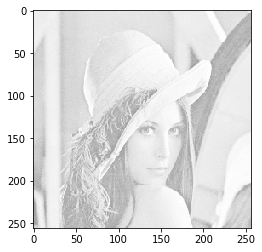

In [5]:
# Open the image. 
img = cv2.imread('lena.pgm') 
  
# Apply log transform. 
c = 255/(np.log(1 + np.max(img))) 
log_transformed = c * np.log(1 + img) 
  
# Specify the data type. 
log_transformed = np.array(log_transformed, dtype = np.uint8)
plt.imshow(log_transformed)
cv2.imwrite('log_transform.png', log_transformed) 

### Power-Law (Gamma) Transformation

In [6]:
img = cv2.imread('lena.pgm') 
  
for gamma in [0.1, 0.5, 1.2, 2.2]: 
    gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8') 
    cv2.imwrite('gamma_transformed'+str(gamma)+'.jpg', gamma_corrected) 

## Histogram

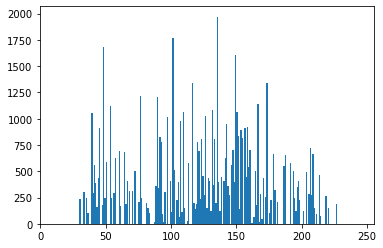

In [7]:
im = cv2.imread('lena.pgm')
vals = im.mean(axis=2).flatten()
counts, bins = np.histogram(vals, range(257))
plt.bar(bins[:-1] - 0.5, counts, width=1, edgecolor='none')
plt.xlim([-0.5, 255.5])
plt.show()

## Edge detection

In [11]:
def convolve2d(image, kernel):
    kernel = np.flipud(np.fliplr(kernel))    
    output = np.zeros_like(image)
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))   
    image_padded[1:-1, 1:-1] = image
    for x in range(image.shape[1]):     
        for y in range(image.shape[0]):
            output[y,x]=(kernel*image_padded[y:y+3,x:x+3]).sum()        
    return output

In [17]:
img = cv2.imread('lena.pgm', cv2.IMREAD_GRAYSCALE).astype(np.float)
kernel = np.array([0, -1, 0, -1, 5, -1, 0, -1, 0]).reshape((3, 3, 1))

output = convolve2d(img, kernel)
cv2.imwrite("edge_detection_out.png", output)

True